In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

import matplotlib.pyplot as plt



In [29]:
dataset=pd.read_csv('../../data/BO1_forcast_customer_demand/forecast_customer_demand.csv')


In [30]:
station_service=pd.read_excel('../../data/data reference/codification clients_NUMCPT.xlsx',header=1)
station_service


,SERVICE,NUMCPT,STATION,GOUVERNORAT,Unnamed: 4
0,RESEAU,150720,ARIANA,ARIANA,
1,RESEAU,152510,MNIHLA,ARIANA,
2,RESEAU,153360,Rte de RAOUED,ARIANA,
3,RESEAU,153650,C.B.Ammar,ARIANA,
4,RESEAU,153990,ENNASR ARIANA,ARIANA,
...,...,...,...,...,...
255,RESEAU,153680,EL FAHS,ZAGHOUAN,NaN
256,RESEAU,153690,BIR MCHERGA,ZAGHOUAN,NaN
257,RESEAU,153780,H.ZRIBA,ZAGHOUAN,NaN
258,RESEAU,154360,ENNADHOUR,ZAGHOUAN,NaN


# 1-Data Understanding

## 1.1 Data info

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21775 entries, 0 to 21774
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NOMDPO       21775 non-null  object 
 1   LIBPRD       21775 non-null  object 
 2   NUMCPT       21775 non-null  object 
 3   MOIS         21775 non-null  object 
 4   CODGVR       21775 non-null  object 
 5   CODLOC       21775 non-null  object 
 6   SUM(MNTHT)   21775 non-null  float64
 7   prixHT       21764 non-null  object 
 8   SUM(QTEPRD)  21775 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.5+ MB


In [32]:
dataset = dataset.assign(
    prixHT=lambda x: x.apply(
        lambda row: 0 if row['SUM(MNTHT)'] < 0 or row['SUM(QTEPRD)'] == 0 else row['SUM(MNTHT)'] / row['SUM(QTEPRD)'], 
        axis=1
    )
)

<b>NOMDPO</b>: name of agil depot  <br>
<b>LIBPRD</b>: type of product that will be delivered <br>
<b>NUMCPT</b>:  name of the gas station <br>
<b>MONTH</b>: delivery date<br>
<b>CODGVR</b>: governorate of gas station<br>
<b>CODLOC</b>: region of gas station<br>
<b>SUM(MNTHT)</b>: total amount to be paid excluding tax<br>
<b>SUM(QTEPRD)</b>: total quantity delivered<br>
<b>prixHT</b>: unit price<br>

## 1.2 Null Values:

In [33]:
dataset.isnull().values.any()


False

### Remove Negative Values

In [34]:
negative=dataset[dataset['SUM(MNTHT)']<0]



In [35]:
dataset=dataset[dataset['SUM(MNTHT)']>=0]


In [36]:
dataset = dataset.dropna()


## 1.3 Duplicates values


### Remove duplicates


In [37]:
dataset=dataset.drop_duplicates()
print("Shape of dataset after removing duplicates:",dataset.shape)

Shape of dataset after removing duplicates: (21746, 9)


## 1.4 Data Vizualiastion


#### 1.4.1 Station distribution in each governorate

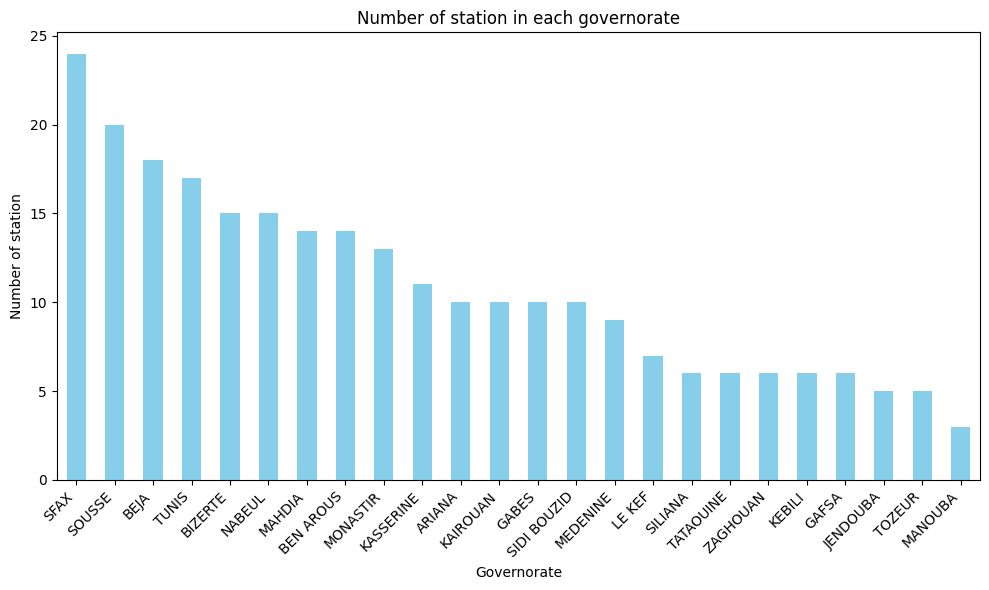

In [38]:
nbr_station=station_service['GOUVERNORAT'].value_counts()
# Tracer le graphique
plt.figure(figsize=(10, 6))
nbr_station.plot(kind='bar', color='skyblue')
plt.title('Number of station in each governorate')
plt.xlabel('Governorate')
plt.ylabel('Number of station')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

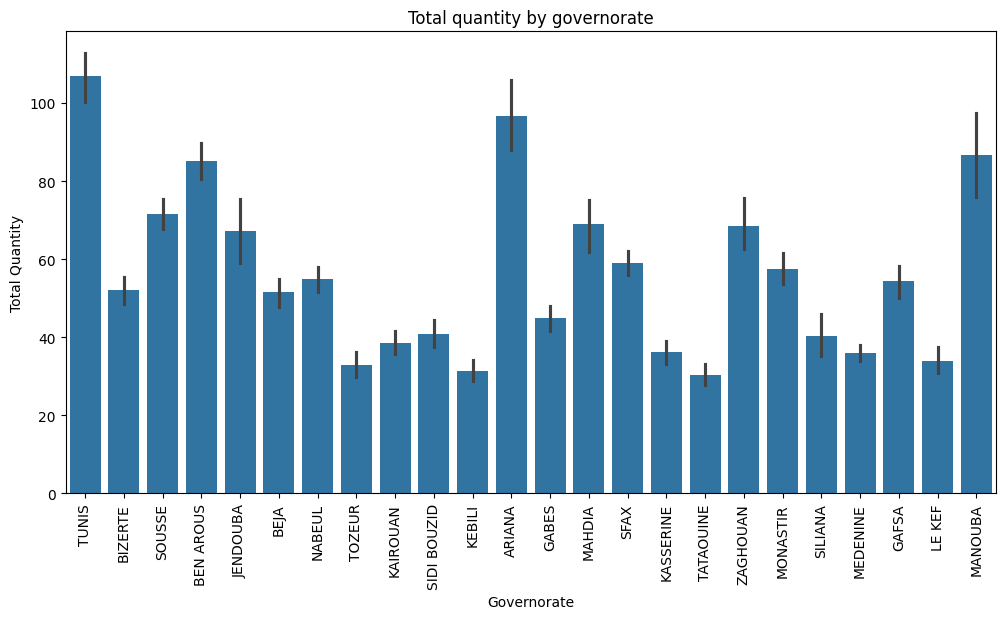

In [39]:
# Visualisation par gouvernorat
plt.figure(figsize=(12, 6))
sns.barplot(x='CODGVR', y='SUM(QTEPRD)', data=dataset)
plt.title('Total quantity by governorate')
plt.xlabel('Governorate')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.show()

## <i>Interpretation</i>

 Tunis consumes more fuel than other governorate and this reflects : <br>
-the high density population for tunisia's capital <br>
-the high economic activity 


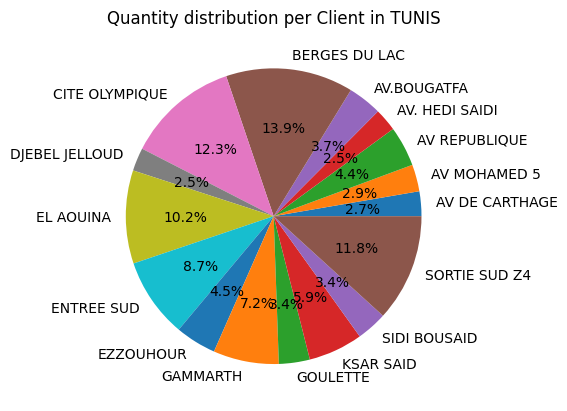

In [40]:
df_tunis = dataset[dataset["CODGVR"] == "TUNIS"]
df_somme_client = df_tunis.groupby(["NUMCPT"])["SUM(QTEPRD)"].sum()
plt.pie(df_somme_client.values, labels=df_somme_client.index, autopct="%1.1f%%")
plt.title("Quantity distribution per Client in TUNIS")
plt.show()

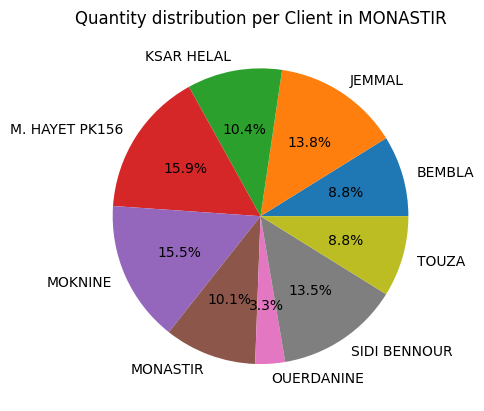

In [41]:
df_monastir = dataset[dataset["CODGVR"] == "MONASTIR"]

df_somme_client = df_monastir.groupby(["NUMCPT"])["SUM(QTEPRD)"].sum()

plt.pie(df_somme_client.values, labels=df_somme_client.index, autopct="%1.1f%%")

plt.title("Quantity distribution per Client in MONASTIR")

plt.show()

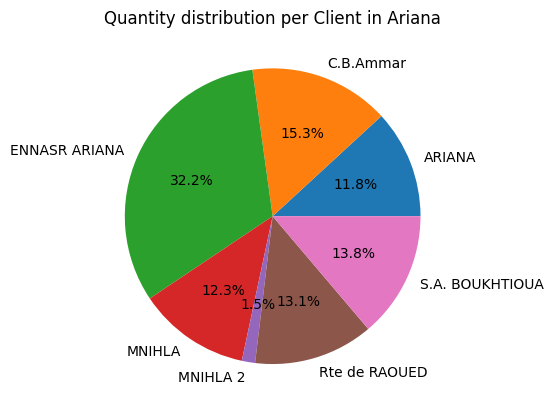

In [42]:
df_ariana = dataset[dataset["CODGVR"] == "ARIANA"]

df_somme_client = df_ariana.groupby(["NUMCPT"])["SUM(QTEPRD)"].sum()

plt.pie(df_somme_client.values, labels=df_somme_client.index, autopct="%1.1f%%")

plt.title("Quantity distribution per Client in Ariana")

plt.show()

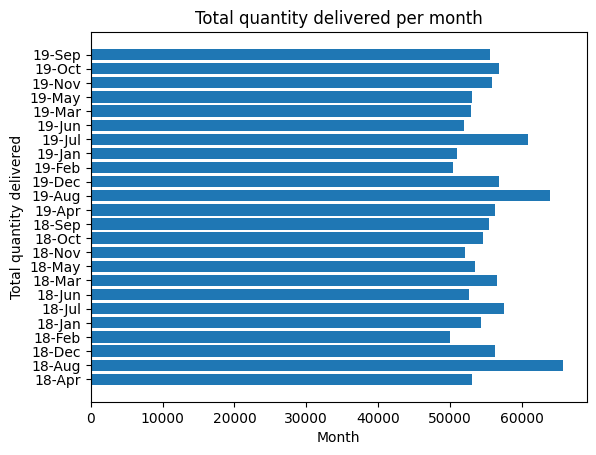

In [43]:
import matplotlib.pyplot as plt

df_somme_mensuelle = dataset.groupby(["MOIS"])["SUM(QTEPRD)"].sum()

plt.barh(df_somme_mensuelle.index, df_somme_mensuelle)
plt.xlabel("Month")
plt.ylabel("Total quantity delivered")
plt.title("Total quantity delivered per month")
plt.show()

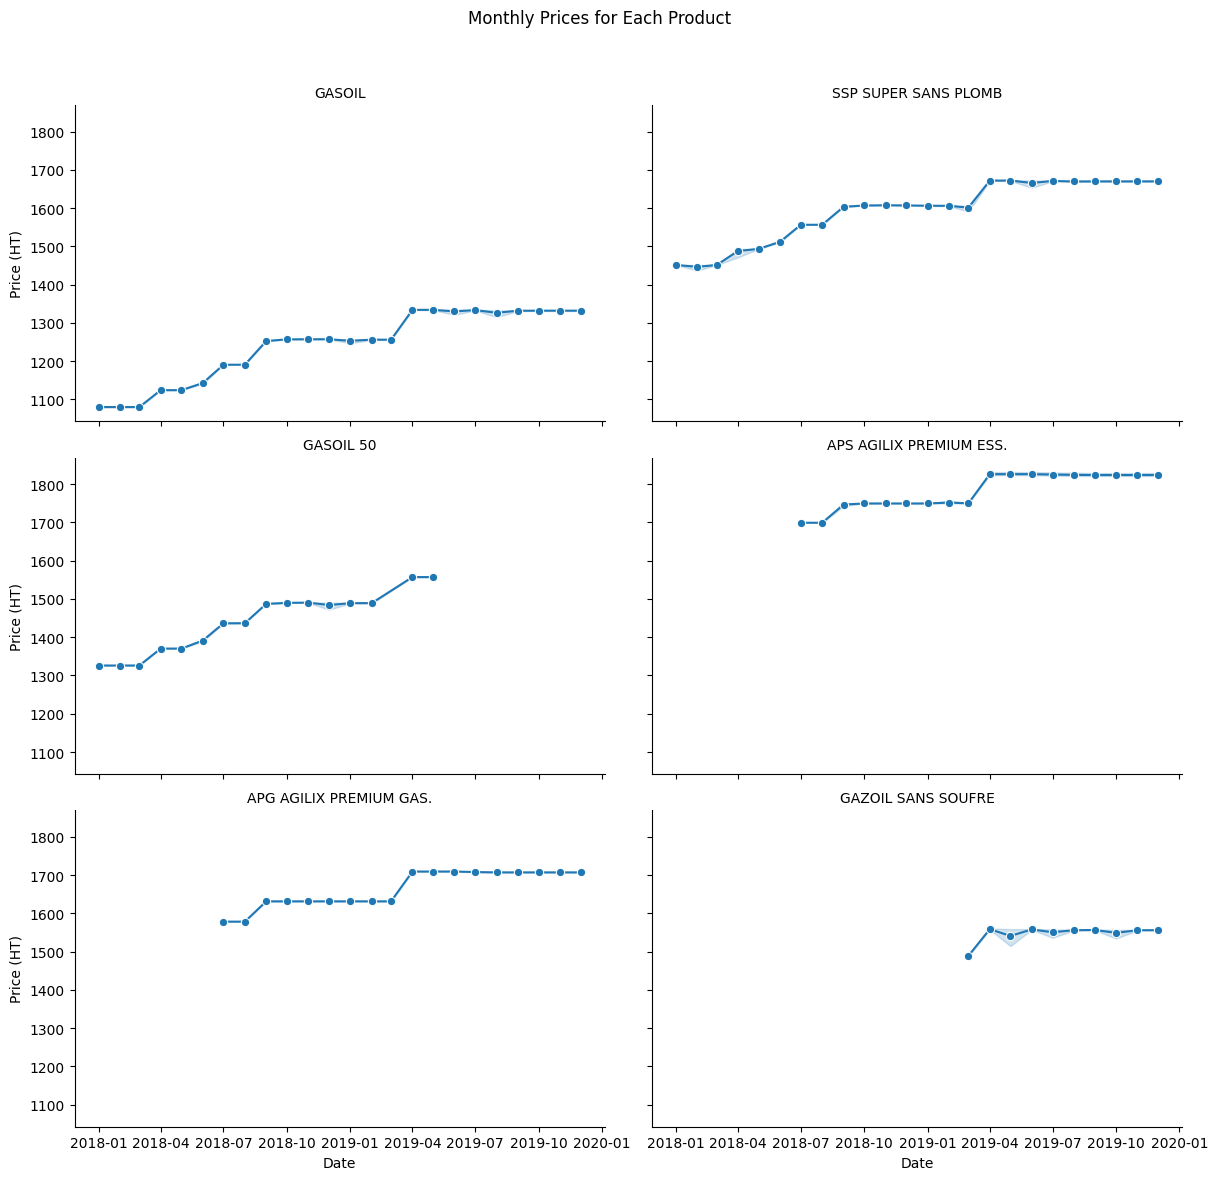

In [44]:

dataset['MOIS'] = pd.to_datetime(dataset['MOIS'], format='%y-%b')
# Tracer le graphique avec seaborn
g = sns.FacetGrid(dataset, col="LIBPRD", col_wrap=2, height=4, aspect=1.5)
g.map(sns.lineplot, "MOIS", "prixHT", marker='o')
g.set_axis_labels("Date", "Price (HT)")
g.set_titles("{col_name}")
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Prices for Each Product')
plt.show()

## <i>Interpretation</i>
-There is a notable variation in the quantity of fuel delivered each month and especially for <b>Aug-18 </b>After refering to the 'monthly prices for each product' graph, we can interpret that this spike is  relevant <b>to the increase of fuel price in sept-18</b>
<br>
-There could be times of year when fuel demand increases, perhaps due to holidays or weather changes and this happened especially during summer vacation (July-19,Aug-19,Aug-18)



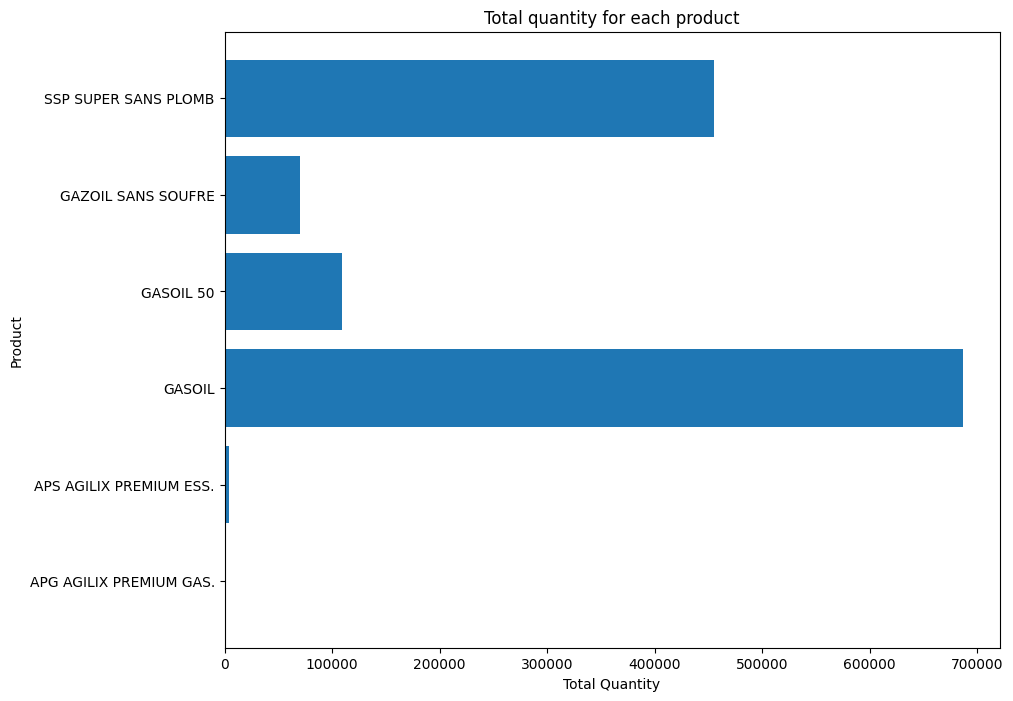

In [45]:
import matplotlib.pyplot as plt

# Calculer la quantité totale de carburant livré pour chaque produit
df_somme_produit = dataset.groupby(["LIBPRD"])["SUM(QTEPRD)"].sum()
# Créer un bar plot pour chaque produit

plt.figure(figsize=(10, 8))
plt.barh(df_somme_produit.index, df_somme_produit)
plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.title('Total quantity for each product')
plt.show()

# 2-Data Preparation

### 2.1 Outliers

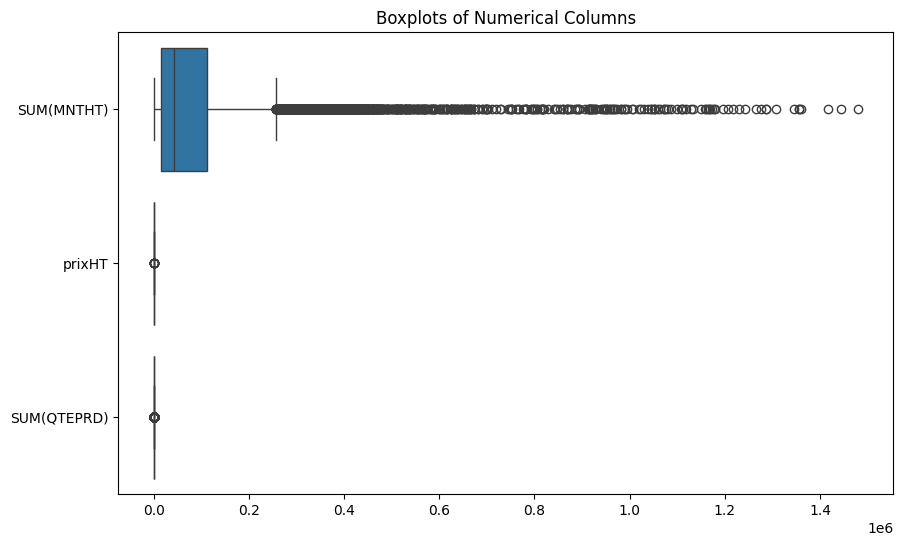

In [46]:
import seaborn as sns


numerical_columns = dataset.select_dtypes(include=['float64']).columns
# Create a boxplot for all numerical columns on the same graph
plt.figure(figsize=(10, 6))  # Adjust size if needed
sns.boxplot(data=dataset[numerical_columns], orient='h')
plt.title('Boxplots of Numerical Columns')
plt.show()

### Outliers of PrixHt

In [47]:
def calculate_outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

lower_bound, upper_bound = calculate_outlier_bounds(dataset['prixHT'])

# Sélectionner les lignes qui contiennent des outliers dans 'prixHT'
outliers = dataset[(dataset['prixHT'] < lower_bound) | (dataset['prixHT'] > upper_bound)]

# Afficher les lignes contenant les outliers
outliers



,NOMDPO,LIBPRD,NUMCPT,MOIS,CODGVR,CODLOC,SUM(MNTHT),prixHT,SUM(QTEPRD)
5552,SKHIRA,SSP SUPER SANS PLOMB,KSOUR ESSEF,2018-02-01,MAHDIA,KSOUR ESSAF,0.0,0.0,0.0
5892,SKHIRA,GASOIL 50,REMADA,2018-12-01,TATAOUINE,REMADA,0.0,0.0,0.0
9327,GERANT POIT DE VENTE,GASOIL,AV. HEDI SAIDI,2019-01-01,TUNIS,TUNIS VILLE,119.4,0.0,0.0
9531,SKHIRA,GAZOIL SANS SOUFRE,BOUJARBOU,2019-10-01,SFAX,BOUJARBOU,0.0,0.0,0.0
9943,SKHIRA,SSP SUPER SANS PLOMB,AV REPUBLIQUE,2018-04-01,TUNIS,TUNIS VILLE,0.0,0.0,0.0
10546,SKHIRA,GAZOIL SANS SOUFRE,S. LAHED .S,2019-05-01,SOUSSE,SOUSSE,0.0,0.0,0.0
10613,BIZERTE CARBURANT,GAZOIL SANS SOUFRE,BIR MCHERGA,2019-05-01,ZAGHOUAN,BIR MCHERGUA,0.0,0.0,0.0
14789,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,TOZOGHRANE,2019-06-01,NABEUL,TOZGRANE,0.0,0.0,0.0
14811,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,BIR MCHERGA,2019-03-01,ZAGHOUAN,BIR MCHERGUA,0.0,0.0,0.0
16137,SKHIRA,GASOIL,JEBENIANA,2019-06-01,SFAX,JBENIANA,0.0,0.0,0.0


In [48]:
lower_bound, upper_bound = calculate_outlier_bounds(dataset['SUM(QTEPRD)'])

# Sélectionner les lignes qui contiennent des outliers dans 'SUM(QTEPRD)'
outliers = dataset[(dataset['SUM(QTEPRD)'] < lower_bound) | (dataset['SUM(QTEPRD)'] > upper_bound)]

# Afficher les lignes contenant les outliers
outliers

,NOMDPO,LIBPRD,NUMCPT,MOIS,CODGVR,CODLOC,SUM(MNTHT),prixHT,SUM(QTEPRD)
9,GOULETTE,SSP SUPER SANS PLOMB,EL MOUROUJ,2018-02-01,BEN AROUS,BIR EL KASSAA,320747.024,1451.344,221.0
25,SKHIRA,GASOIL,SOUASSI,2018-01-01,MAHDIA,SOUASSI,233260.776,1079.911,216.0
26,SKHIRA,GASOIL,AGAREB,2018-01-01,SFAX,AGAREB,340171.965,1079.911,315.0
33,SKHIRA,GASOIL,CHERARDA,2018-01-01,KAIROUAN,CHERARDA,272137.572,1079.911,252.0
58,GOULETTE,GASOIL,BEN AROUS MC 34,2018-03-01,BEN AROUS,BEN AROUS,279696.949,1079.911,259.0
...,...,...,...,...,...,...,...,...,...
21712,GOULETTE,SSP SUPER SANS PLOMB,Rte de RAOUED,2019-12-01,ARIANA,ARIANA,408841.055,1668.739,245.0
21725,GOULETTE,GASOIL,BIR MCHERGA,2019-12-01,ZAGHOUAN,BIR MCHERGUA,326088.385,1330.973,245.0
21727,GOULETTE,GASOIL,KONDAR,2019-12-01,SOUSSE,KONDAR,370010.494,1330.973,278.0
21745,GOULETTE,GASOIL,EL MOUROUJ,2019-12-01,BEN AROUS,BIR EL KASSAA,307454.763,1330.973,231.0


In [49]:
lower_bound, upper_bound = calculate_outlier_bounds(dataset['SUM(MNTHT)'])

outliers = dataset[(dataset['SUM(MNTHT)'] < lower_bound) | (dataset['SUM(MNTHT)'] > upper_bound)]

outliers

,NOMDPO,LIBPRD,NUMCPT,MOIS,CODGVR,CODLOC,SUM(MNTHT),prixHT,SUM(QTEPRD)
9,GOULETTE,SSP SUPER SANS PLOMB,EL MOUROUJ,2018-02-01,BEN AROUS,BIR EL KASSAA,320747.024,1451.344,221.0
26,SKHIRA,GASOIL,AGAREB,2018-01-01,SFAX,AGAREB,340171.965,1079.911,315.0
33,SKHIRA,GASOIL,CHERARDA,2018-01-01,KAIROUAN,CHERARDA,272137.572,1079.911,252.0
58,GOULETTE,GASOIL,BEN AROUS MC 34,2018-03-01,BEN AROUS,BEN AROUS,279696.949,1079.911,259.0
61,GOULETTE,SSP SUPER SANS PLOMB,BERGES DU LAC,2018-03-01,TUNIS,TUNIS VILLE,1230739.712,1451.344,848.0
...,...,...,...,...,...,...,...,...,...
21712,GOULETTE,SSP SUPER SANS PLOMB,Rte de RAOUED,2019-12-01,ARIANA,ARIANA,408841.055,1668.739,245.0
21725,GOULETTE,GASOIL,BIR MCHERGA,2019-12-01,ZAGHOUAN,BIR MCHERGUA,326088.385,1330.973,245.0
21727,GOULETTE,GASOIL,KONDAR,2019-12-01,SOUSSE,KONDAR,370010.494,1330.973,278.0
21745,GOULETTE,GASOIL,EL MOUROUJ,2019-12-01,BEN AROUS,BIR EL KASSAA,307454.763,1330.973,231.0


Leave only price > 0

In [50]:
dataset=dataset[dataset['prixHT']>0]

### 2.2 Order data

In [51]:
dataset= dataset.sort_values(by="MOIS")


In [52]:
dataset = dataset.sort_values(by=['NUMCPT', 'LIBPRD', 'MOIS'])


### 2.3 Add Lagging

In [63]:
dataset['lag1_previous_quantity'] = dataset.groupby(['NUMCPT','LIBPRD'])['SUM(QTEPRD)'].shift(1)
dataset['lag2_previous_quantity'] = dataset.groupby(['NUMCPT','LIBPRD'])['SUM(QTEPRD)'].shift(2)
dataset['lag3_previous_quantity'] = dataset.groupby(['NUMCPT','LIBPRD'])['SUM(QTEPRD)'].shift(3)
dataset['lag4_previous_quantity'] = dataset.groupby(['NUMCPT','LIBPRD'])['SUM(QTEPRD)'].shift(4)
dataset['lag5_previous_quantity'] = dataset.groupby(['NUMCPT','LIBPRD'])['SUM(QTEPRD)'].shift(5)



In [64]:
dataset['lag1_previous_quantity'].fillna(0, inplace=True)
dataset['lag2_previous_quantity'].fillna(0, inplace=True)
dataset['lag3_previous_quantity'].fillna(0, inplace=True)
dataset['lag4_previous_quantity'].fillna(0, inplace=True)
dataset['lag5_previous_quantity'].fillna(0, inplace=True)



In [67]:
columns = list(dataset.columns)
columns.append(columns.pop(columns.index('SUM(QTEPRD)')))
dataset = dataset[columns]
dataset

,NOMDPO,LIBPRD,NUMCPT,MOIS,CODGVR,CODLOC,SUM(MNTHT),prixHT,lag1_previous_quantity,lag2_previous_quantity,lag3_previous_quantity,lag4_previous_quantity,lag5_previous_quantity,SUM(QTEPRD)
26,SKHIRA,GASOIL,AGAREB,2018-01-01,SFAX,AGAREB,340171.965,1079.911,0.0,0.0,0.0,0.0,0.0,315.0
20445,SKHIRA,GASOIL,AGAREB,2018-02-01,SFAX,AGAREB,308854.546,1079.911,315.0,0.0,0.0,0.0,0.0,286.0
20435,SKHIRA,GASOIL,AGAREB,2018-03-01,SFAX,AGAREB,343411.698,1079.911,286.0,315.0,0.0,0.0,0.0,318.0
13854,SKHIRA,GASOIL,AGAREB,2018-04-01,SFAX,AGAREB,342868.495,1124.159,318.0,286.0,315.0,0.0,0.0,305.0
1617,SKHIRA,GASOIL,AGAREB,2018-05-01,SFAX,AGAREB,259680.729,1124.159,305.0,318.0,286.0,315.0,0.0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,ZARZOUNA,2019-09-01,BIZERTE,ZARZOUNA,210261.114,1668.739,152.0,150.0,117.0,120.0,116.0,126.0
2311,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,ZARZOUNA,2019-10-01,BIZERTE,ZARZOUNA,206923.636,1668.739,126.0,152.0,150.0,117.0,120.0,124.0
13587,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,ZARZOUNA,2019-11-01,BIZERTE,ZARZOUNA,200248.680,1668.739,124.0,126.0,152.0,150.0,117.0,120.0
2702,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,ZARZOUNA,2019-12-01,BIZERTE,ZARZOUNA,201917.419,1668.739,120.0,124.0,126.0,152.0,150.0,121.0


In [68]:
dataset.to_csv('../../data/BO1_forcast_customer_demand/shifted.csv')

### 2.4 add duration column between two dates of restocking 

In [124]:
#after getting further data

### 2.4 Data transformation 

In [87]:
data_transformed=pd.read_csv('../../data/BO1_forcast_customer_demand/shifted.csv' )


In [91]:
#data_transformed.drop(columns=['Unnamed: 0'], inplace=True)
data_transformed

,NOMDPO,LIBPRD,NUMCPT,MOIS,CODGVR,CODLOC,SUM(MNTHT),prixHT,lag1_previous_quantity,lag2_previous_quantity,lag3_previous_quantity,lag4_previous_quantity,lag5_previous_quantity,SUM(QTEPRD)
0,SKHIRA,GASOIL,AGAREB,2018-01-01,SFAX,AGAREB,340171.965,1079.911,0.0,0.0,0.0,0.0,0.0,315.0
1,SKHIRA,GASOIL,AGAREB,2018-02-01,SFAX,AGAREB,308854.546,1079.911,315.0,0.0,0.0,0.0,0.0,286.0
2,SKHIRA,GASOIL,AGAREB,2018-03-01,SFAX,AGAREB,343411.698,1079.911,286.0,315.0,0.0,0.0,0.0,318.0
3,SKHIRA,GASOIL,AGAREB,2018-04-01,SFAX,AGAREB,342868.495,1124.159,318.0,286.0,315.0,0.0,0.0,305.0
4,SKHIRA,GASOIL,AGAREB,2018-05-01,SFAX,AGAREB,259680.729,1124.159,305.0,318.0,286.0,315.0,0.0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21729,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,ZARZOUNA,2019-09-01,BIZERTE,ZARZOUNA,210261.114,1668.739,152.0,150.0,117.0,120.0,116.0,126.0
21730,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,ZARZOUNA,2019-10-01,BIZERTE,ZARZOUNA,206923.636,1668.739,126.0,152.0,150.0,117.0,120.0,124.0
21731,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,ZARZOUNA,2019-11-01,BIZERTE,ZARZOUNA,200248.680,1668.739,124.0,126.0,152.0,150.0,117.0,120.0
21732,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,ZARZOUNA,2019-12-01,BIZERTE,ZARZOUNA,201917.419,1668.739,120.0,124.0,126.0,152.0,150.0,121.0


In [92]:
categorical_columns = ['NOMDPO', 'LIBPRD', 'NUMCPT','CODGVR','CODLOC']

# Appliquer l'encodage one-hot
data_transformed = pd.get_dummies(data_transformed, columns=categorical_columns)

In [97]:
data_transformed['MOIS'] = pd.to_datetime(data_transformed['MOIS'])
data_transformed['Year'] = data_transformed['MOIS'].dt.year
data_transformed['Month'] = data_transformed['MOIS'].dt.month
data_transformed['Day'] = data_transformed['MOIS'].dt.day
data_transformed['Weekday'] = data_transformed['MOIS'].dt.weekday
data_transformed['Quarter'] = data_transformed['MOIS'].dt.quarter

# Supprimer la colonne MOIS
data_transformed.drop(columns=['MOIS'], inplace=True)

### 2.5 Feature Scaling

In [102]:
 
data_transformed[data_transformed.select_dtypes(include='bool').columns] = data_transformed.select_dtypes(include='bool').astype(int)


In [104]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the original DataFrame without non-numeric columns
numeric_data = data_transformed.select_dtypes(include=['number'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numeric columns
dataset_normalized = scaler.fit_transform(numeric_data)

# Convert the normalized array back to a DataFrame
dataset_normalized = pd.DataFrame(dataset_normalized, columns=numeric_data.columns)

In [107]:
columns = list(dataset_normalized.columns)
columns.append(columns.pop(columns.index('SUM(QTEPRD)')))
dataset_normalized = dataset_normalized[columns]
dataset_normalized

,SUM(MNTHT),prixHT,lag1_previous_quantity,lag2_previous_quantity,lag3_previous_quantity,lag4_previous_quantity,lag5_previous_quantity,NOMDPO_BIZERTE CARBURANT,NOMDPO_GOULETTE,NOMDPO_SKHIRA,...,CODLOC_TUNIS VILLE,CODLOC_ZAGHOUAN,CODLOC_ZARZIS,CODLOC_ZARZOUNA,Year,Month,Day,Weekday,Quarter,SUM(QTEPRD)
0,0.228694,0.002421,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.353273
1,0.207505,0.002421,0.354730,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.500000,0.000000,0.320542
2,0.230886,0.002421,0.322072,0.354730,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.500000,0.000000,0.356659
3,0.230518,0.055990,0.358108,0.322072,0.354730,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.272727,0.0,1.000000,0.333333,0.341986
4,0.174235,0.055990,0.343468,0.358108,0.322072,0.354730,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.363636,0.0,0.166667,0.333333,0.258465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21729,0.140798,0.715287,0.171171,0.168919,0.131757,0.135135,0.130631,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.727273,0.0,1.000000,0.666667,0.139955
21730,0.138540,0.715287,0.141892,0.171171,0.168919,0.131757,0.135135,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.818182,0.0,0.166667,1.000000,0.137698
21731,0.134024,0.715287,0.139640,0.141892,0.171171,0.168919,0.131757,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.909091,0.0,0.666667,1.000000,0.133183
21732,0.135153,0.715287,0.135135,0.139640,0.141892,0.171171,0.168919,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.000000,0.0,1.000000,1.000000,0.134312


# 3- Modeling

